In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
z = pd.read_csv('Sample - Superstore.csv',encoding='Latin-1')
z.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Provides the indexing info 
z.index

RangeIndex(start=0, stop=9994, step=1)

In [5]:
# Overview of the dataset
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
z.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


* Since we have 'Order Date' and 'Ship Date' columns in this dataset, we can add separate columns of Day, Month and Year for time-series analysis
* Also we need to convert these columns from 'object' to 'datetime' data types

In [25]:
z['Order Date'] = pd.to_datetime(z['Order Date'])
z['Ship Date'] = pd.to_datetime(z['Ship Date'])
z['Order Month'] = z['Order Date'].dt.month
z['Order Year'] = z['Order Date'].dt.year
z['Order Day of Week'] = z['Order Date'].dt.dayofweek
z
z.query("`Order Month`==11")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,11,2016,1
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,11,2015,6
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,11,2015,6
16,17,CA-2014-105893,2014-11-11,2014-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176,11,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,9957,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,Office Supplies,Paper,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",46.350,5,0.0,21.7845,11,2014,1
9957,9958,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,Office Supplies,Paper,Xerox 1882,223.920,4,0.0,109.7208,11,2014,1
9958,9959,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,Office Supplies,Supplies,Acme Value Line Scissors,7.300,2,0.0,2.1900,11,2014,1
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964,11,2017,4


# Sales per Month

* By grouping and taking the summation of the Columns 'Sales' and 'Order Month' we arrive at a mini-dataframe containing these 2 aforementioned columns carved out from the main dataframe

* reset_index is done to include the numeric indexing otherwise it takes 'Order Month' as the index column


In [10]:
# Calculating monthly sales and grouping them
Monthly_Sales = z.groupby('Order Month')['Sales'].sum().reset_index()
Monthly_Sales

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


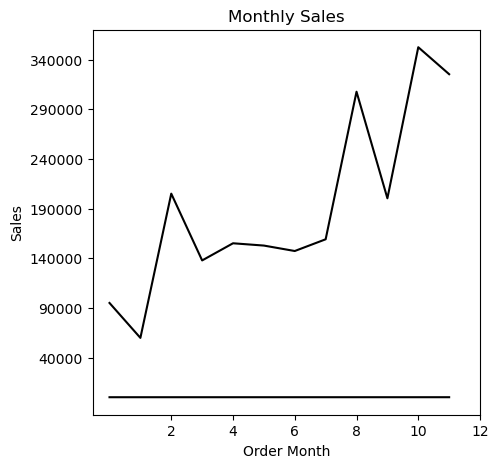

In [11]:
plt.figure(figsize=(5,5))

plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.plot(Monthly_Sales,linestyle='-',color='k')
plt.xticks(np.arange(2,14,2))
plt.yticks(np.arange(40000,350000,50000))
plt.show()

# Sales by Category

**Code breakdown:**

* *groupby('Category')- groups unique values of 'Category'*
* *An aggregation operation of sum() is performed on the grouped 'Category' values with 'Sales' to determine our goal which was 'Sales by Category*
* *After this, the indexing goes to 'Category' by default and its values act as row labels. To revert it and assign integer indexing we use reset_index()*

In [12]:
Sales_by_Category = z.groupby('Category')['Sales'].sum().reset_index()
Sales_by_Category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


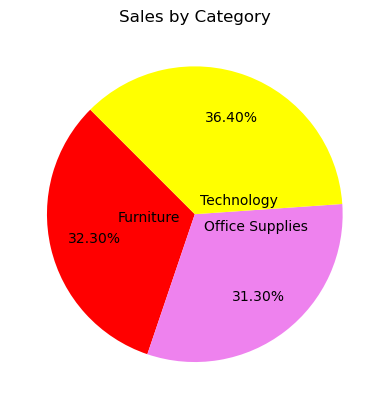

In [13]:
colors = ['red','violet','yellow']
plt.pie(Sales_by_Category['Sales'],autopct='%0.2f%%',labels=Sales_by_Category['Category'],colors=colors,
        labeldistance=.1,pctdistance=.7,textprops={'color':'k'},startangle=135)
plt.title('Sales by Category')
plt.show()


# Sales by Sub-Category

In [14]:
Sales_by_Sub_category = z.groupby('Sub-Category')['Sales'].sum().reset_index()
Sales_by_Sub_category

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


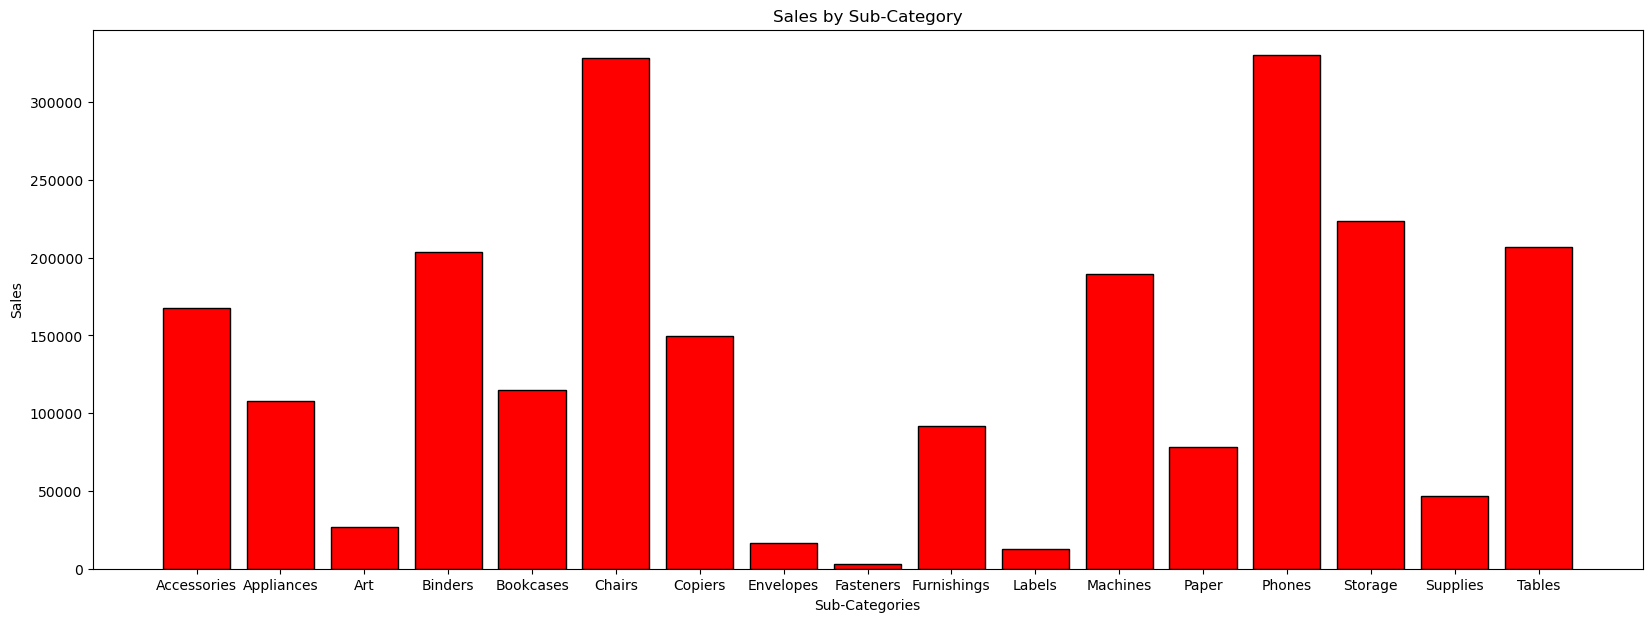

In [15]:
plt.figure(figsize=(20,7))
plt.bar(Sales_by_Sub_category['Sub-Category'],Sales_by_Sub_category['Sales'],color='r',edgecolor='k')
plt.xlabel('Sub-Categories')
plt.ylabel('Sales')
plt.title('Sales by Sub-Category')
plt.show()

# Profits per Month

In [16]:
# Calculating monthly profits and grouping them
Monthly_Profits = z.groupby('Order Month')['Profit'].sum().reset_index()
Monthly_Profits

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


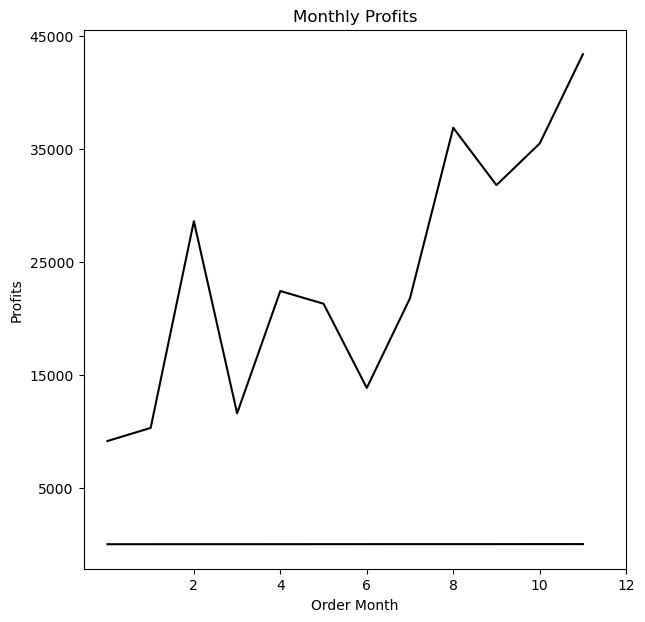

In [17]:
plt.figure(figsize=(7,7))

plt.xlabel('Order Month')
plt.ylabel('Profits')
plt.title('Monthly Profits')
plt.plot(Monthly_Profits,linestyle='-',color='k')
plt.xticks(np.arange(2,14,2))
plt.yticks(np.arange(5000,50000,10000))
plt.show()

# Profits by Category

In [18]:
Profits_by_Category = z.groupby('Category')['Profit'].sum().reset_index()
Profits_by_Category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


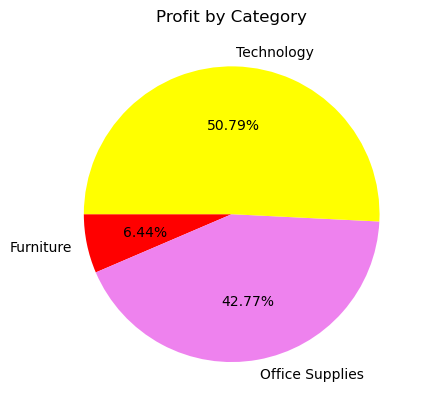

In [19]:
colors = ['red','violet','yellow']
plt.pie(Profits_by_Category['Profit'],autopct='%0.2f%%',labels=Profits_by_Category['Category'],colors=colors,startangle=180)
plt.title('Profit by Category')
plt.show()

# Profits by Sub-Category

In [20]:
Profits_by_Sub_Category = z.groupby('Sub-Category')['Profit'].sum().reset_index()
Profits_by_Sub_Category

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


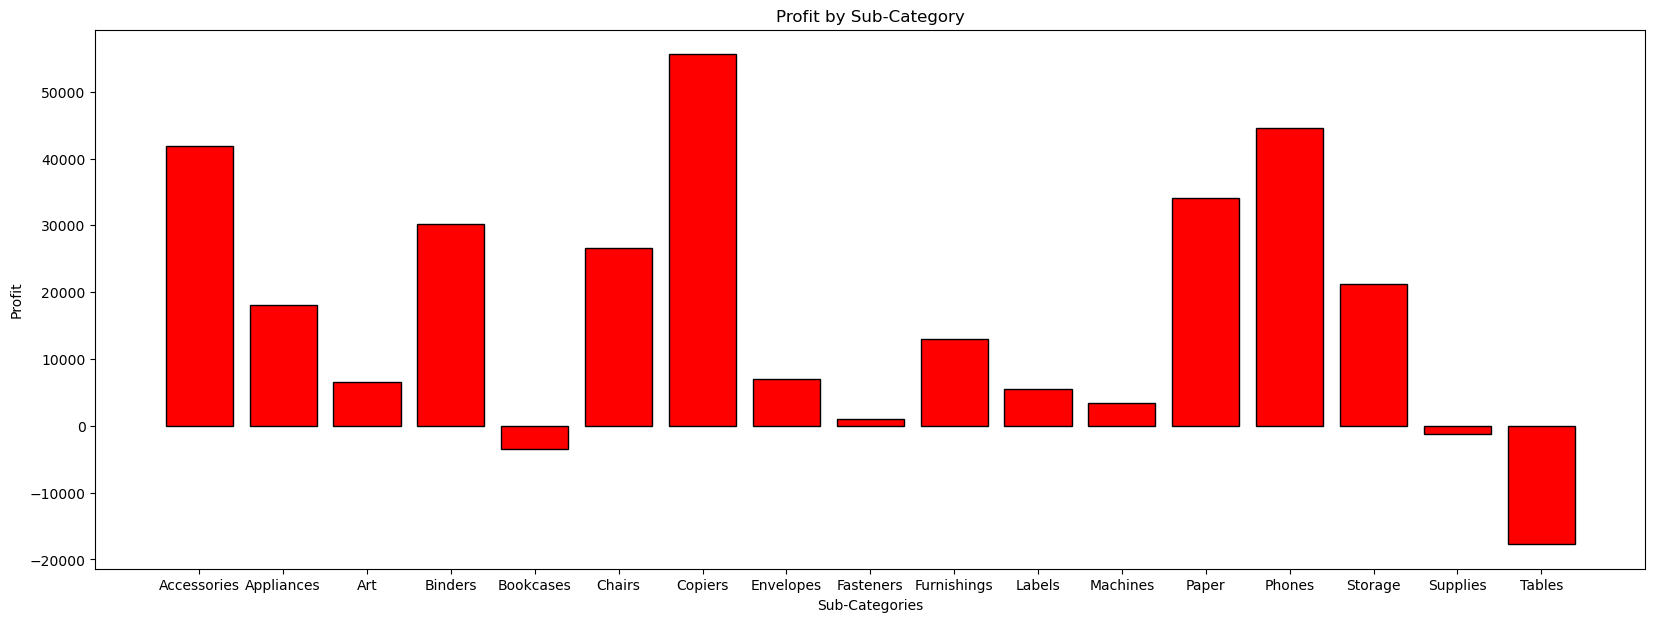

In [21]:
plt.figure(figsize=(20,7))
plt.bar(Profits_by_Sub_Category['Sub-Category'],Profits_by_Sub_Category['Profit'],color='r',edgecolor='k')
plt.xlabel('Sub-Categories')
plt.ylabel('Profit')
plt.title('Profit by Sub-Category')
plt.show()

In [22]:
Sales_Profit_by_Segment = z.groupby('Segment').agg({'Sales': 'sum','Profit': 'sum'}).reset_index()
Sales_Profit_by_Segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


* As can be seen from the below figure, Profits from the Product Sales of the Consumer segment is higher than that of Corporate segment

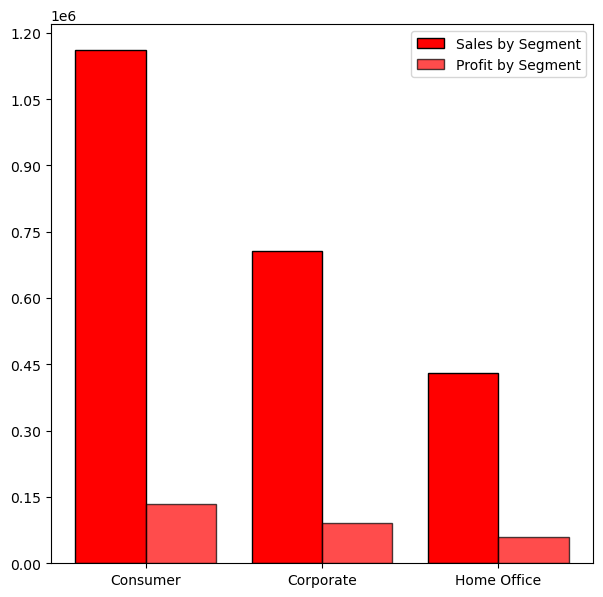

In [23]:
plt.figure(figsize=(7,7))
SPbyS = np.arange(len(Sales_Profit_by_Segment['Segment']))
plt.bar(SPbyS-0.2,Sales_Profit_by_Segment['Sales'],label='Sales by Segment',width=0.4,color='r',edgecolor='k')
plt.bar(SPbyS+0.2,Sales_Profit_by_Segment['Profit'],label='Profit by Segment',width=0.4,color='r',edgecolor='k',alpha=0.7)
plt.legend()

plt.xticks(SPbyS,Sales_Profit_by_Segment['Segment'])
plt.yticks(np.arange(0,1250000,150000))
plt.show()

* But, the Profit-to-Sales ratio for the Corporate segment is comparatively better than that of Consumer segment. We can validate this by ratio calculations below

In [24]:
Sales_Profit_by_Segment['Sales2Profit_Ratio'] = Sales_Profit_by_Segment['Sales']/Sales_Profit_by_Segment['Profit']
print(Sales_Profit_by_Segment[['Segment','Sales2Profit_Ratio']])
Sales_Profit_by_Segment

       Segment  Sales2Profit_Ratio
0     Consumer            8.659471
1    Corporate            7.677245
2  Home Office            7.125416


,Segment,Sales,Profit,Sales2Profit_Ratio
0,Consumer,1.161401e+06,134119.2092,8.659471
1,Corporate,7.061464e+05,91979.1340,7.677245
2,Home Office,4.296531e+05,60298.6785,7.125416
